# Training IELTS Grammar Correction Model
---
***Last Run 7 Jun 2023 12:45 AM***

This notebook are used to fine tuning IELTS Grammar Correction Model. This model are build with [Transformers T5 Model](https://huggingface.co/docs/transformers/model_doc/t5) and [Happy Transformer Package](https://www.vennify.ai/about/). We will use [t5-base](https://huggingface.co/t5-base) for base model to fine tuning grammar correction.

To fine tuning this model, we use 2 dataset [JFLEG (JHU FLuency-Extended GUG)](https://huggingface.co/datasets/jfleg) Dataset and [C4_200M](https://github.com/google-research-datasets/C4_200M-synthetic-dataset-for-grammatical-error-correction) Dataset.

In this notebook there are several process to fine tuning model.

1.   Preprocessing.
2.   Fine tuning.
3.   Evaluate and predict.
4.   Save model.
5.   Load model.

To fine tuning model, there are several library to use in this process. Required library:

1.   OS.
2.   GIT-LFS.
3.   Happy Transformer.
4.   Hugging Face Hub.
5.   Datasets.
6.   Pandas.
7.   Scikit-Learn.
8.   CSV.
9.   Dotenv.
10.  Datetime.
11.  Time.
12.  Matplotlib.



This notebook are save in [Colab](https://colab.research.google.com/drive/19m_Texmbd61KbkC2xdQgnEaD74SbTmoq?usp=sharing) or [Github](https://github.com/IELTSSpeakingApplication/MachineLearning/tree/main/Training/Grammar). The models result are save in [Hugging Face Hub](https://huggingface.co/hafidikhsan) 

***Fine tuning process required GPU Accelerator***

---
For comparison of model results, we carry out the training process with various combination of datasets but still use the same model architecture. We did some fine tuning process because we want to get maximum results for the grammar correction model.

In this experiment, we use a [JFLEG (JHU FLuency-Extended GUG)](https://huggingface.co/datasets/jfleg) Dataset

In [6]:
#@title Accelerate PyTorch
%%capture
!pip install --upgrade accelerate

‼️ ***Restart runtime***

In [75]:
#@title Install .env
%%capture
!pip install python-dotenv

❗️ ***Load .env file***

In [60]:
# Define global variable
import os
from dotenv import load_dotenv

load_dotenv()

DRIVE_DATASET_PATH = "/content/drive/MyDrive/Final Project/Machine Learning/Grammar/Dataset/"

COLAB_BASE_PATH = "/content/"
DRIVE_TARGET_PATH = '''/content/drive/MyDrive/"Final Project"/"Machine Learning"/Grammar/"Fine Tuning"/JFLEG'''

TRAIN_CSV = "Train.csv"
EVAL_CSV = "Eval.csv"

PNG = ".png"
MODEL_EVALUATION = '"Model Evaluation"'
BOXPLOT = '"Boxplot Dataset"'
TRAINING_TIME = '"Training Time"'
MODEL_EVALUATION_PNG = "Model Evaluation.png"
TRAINING_TIME_PNG = "Training Time.png"

REPO_NAME = "IELTS-GEC-T5-JFLEG"
REPO_LINK = "https://huggingface.co/hafidikhsan/" + REPO_NAME

EMAIL = "harifin315@gmail.com"
USERNAME = "hafidikhsan"

COMMIT = '''"Initial commit for IELTS GEC T5 Model with JFLEG Dataset"'''

TOKEN = os.getenv("TOKEN")
HUGGING_FACE_HUB = "https://" + USERNAME + ":" + TOKEN + "@huggingface.co/" + USERNAME + "/" + REPO_NAME

## Preprocessing 🆗

### Install and import library ✅

In [3]:
#@title Install GIT-LFS
%%capture
!sudo apt-get install git-lfs

In [4]:
#@title Install library Happy Transformer, Hugging Face Hub and Datasets
%%capture
!pip install happytransformer
!pip install huggingface_hub
!pip install datasets

In [5]:
# Import library
import csv
import time
import datetime
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from datasets import Dataset, load_dataset, load_from_disk
from happytransformer import HappyTextToText, TTTrainArgs, TTSettings

In [6]:
# Cuda Alocation
import os

os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "max_split_size_mb:512"

In [7]:
# Make pandas dataframe big
pd.set_option("display.max_colwidth", None)

### Import base model ✅

In [8]:
# Import base model T5
happy_t5 = HappyTextToText("T5", "t5-base")

/usr/local/lib/python3.10/dist-packages/transformers/models/t5/tokenization_t5_fast.py:155: FutureWarning: This tokenizer was incorrectly instantiated with a model max length of 512 which will be corrected in Transformers v5.
For now, this behavior is kept to avoid breaking backwards compatibility when padding/encoding with `truncation is True`.
- Be aware that you SHOULD NOT rely on t5-base automatically truncating your input to 512 when padding/encoding.
- If you want to encode/pad to sequences longer than 512 you can either instantiate this tokenizer with `model_max_length` or pass `max_length` when encoding/padding.
- To avoid this warning, please instantiate this tokenizer with `model_max_length` set to your preferred value.
  warnings.warn(


### Import datasets ✅

#### Drive 🟠

In [9]:
# Drive access
from google.colab import drive

drive.mount("/content/drive")

Mounted at /content/drive


##### C4_200M 15k 🔵

In [ ]:
# Read dataset
df_c4_15k = pd.read_csv(DRIVE_DATASET_PATH + "c4_200m_15k.csv")
df_c4_15k.head()

##### C4_200M 100k 🔵

In [ ]:
# Read dataset
df_c4_100k = pd.read_csv(DRIVE_DATASET_PATH + "c4_200m_100k.csv")
df_c4_100k.head()

##### C4_200M All 🟠

In [ ]:
# Load local dataset
local_hugging_face = load_from_disk(DRIVE_DATASET_PATH + "/c4_200m")
local_hugging_face

###### All 🔵

In [ ]:
# Datasets to pandas
df_c4_all = local_hugging_face["train"].to_pandas()
df_c4_all.head()

###### Cut 🔵

In [ ]:
# Datasets to pandas
df_c4_all_cut = local_hugging_face["train"].to_pandas()
df_c4_all_cut.head()

In [ ]:
# Define sample
sample_data = 1000000

In [ ]:
# Get sample dataset
df_c4_cut = df_c4_all_cut.sample(n=sample_data)
df_c4_cut.head()

#### Hugging Face 🟠

##### C4_200M 125k 🔵

In [ ]:
# Load dataset
dataset_c4_125k = load_dataset("leslyarun/c4_200m_gec_train100k_test25k")

In [ ]:
# Datasets train to pandas
df_train_c4_125k = dataset_c4_125k["train"].to_pandas()
df_train_c4_125k.head()

In [ ]:
# Datasets test to pandas
df_test_c4_125k = dataset_c4_125k["test"].to_pandas()
df_test_c4_125k.head()

In [ ]:
# Merging dataset
df_c4_125k = pd.concat([df_train_c4_125k, df_test_c4_125k])
df_c4_125k.head()

##### JFLEG 🔵

In [10]:
# Load dataset
jfleg_train_dataset = load_dataset("jfleg", split="validation[:]")
jfleg_eval_dataset = load_dataset("jfleg", split="test[:]")

Extracting data files:   0%|          | 0/5 [00:00<?, ?it/s]

Extracting data files:   0%|          | 0/5 [00:00<?, ?it/s]

Generating validation split:   0%|          | 0/755 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/748 [00:00<?, ? examples/s]

Dataset jfleg downloaded and prepared to /root/.cache/huggingface/datasets/jfleg/default/1.0.0/ed4ab2367351fe31949f48849ae6732b164f0d5ea6bb5d4357ff4293ac89511b. Subsequent calls will reuse this data.


In [11]:
# Define function to parsing to dataframe
def parsing_to_dataframe(dataset):
    input = []
    target = []

    for case in dataset:
        input_text = case["sentence"]

        for correction in case["corrections"]:
            if input_text and correction:

                input.append(input_text)
                target.append(correction)

    df = pd.DataFrame(list(zip(input, target)), columns=["input", "output"])

    return df

In [12]:
# Parsing dataset train
df_train_jfleg = parsing_to_dataframe(jfleg_train_dataset)
df_train_jfleg.head()

,input,output
0,So I think we can not live if old people could not find siences and tecnologies and they did not developped .,So I think we would not be alive if our ancestors did not develop sciences and technologies .
1,So I think we can not live if old people could not find siences and tecnologies and they did not developped .,So I think we could not live if older people did not develop science and technologies .
2,So I think we can not live if old people could not find siences and tecnologies and they did not developped .,So I think we can not live if old people could not find science and technologies and they did not develop .
3,So I think we can not live if old people could not find siences and tecnologies and they did not developped .,So I think we can not live if old people can not find the science and technology that has not been developed .
4,For not use car .,Not for use with a car .


In [13]:
# Parsing dataset test
df_test_jfleg = parsing_to_dataframe(jfleg_eval_dataset)
df_test_jfleg.head()

,input,output
0,New and new technology has been introduced to the society .,New technology has been introduced to society .
1,New and new technology has been introduced to the society .,New technology has been introduced into the society .
2,New and new technology has been introduced to the society .,Newer and newer technology has been introduced into society .
3,New and new technology has been introduced to the society .,Newer and newer technology has been introduced to the society .
4,One possible outcome is that an environmentally-induced reduction in motorization levels in the richer countries will outweigh any rise in motorization levels in the poorer countries .,One possible outcome is that an environmentally-induced reduction in motorization levels in richer countries will outweigh any rise in motorization levels in poorer countries .


In [14]:
# Merging dataset
df_jfleg = pd.concat([df_train_jfleg, df_test_jfleg])
df_jfleg.head()

,input,output
0,So I think we can not live if old people could not find siences and tecnologies and they did not developped .,So I think we would not be alive if our ancestors did not develop sciences and technologies .
1,So I think we can not live if old people could not find siences and tecnologies and they did not developped .,So I think we could not live if older people did not develop science and technologies .
2,So I think we can not live if old people could not find siences and tecnologies and they did not developped .,So I think we can not live if old people could not find science and technologies and they did not develop .
3,So I think we can not live if old people could not find siences and tecnologies and they did not developped .,So I think we can not live if old people can not find the science and technology that has not been developed .
4,For not use car .,Not for use with a car .


### Merging datasets (Optional) ⁉️

In [ ]:
# Merging dataset
df_merge = pd.concat([df_c4_100k, df_jfleg])
df_merge.head()

### Select dataset ✅

#### C4_200M 🟠

In [ ]:
# Select data for training from C4_200M 15k
df_training = df_c4_15k

In [ ]:
# Select data for training from C4_200M 100k
df_training = df_c4_100k

In [ ]:
# Select data for training from C4_200M 125k
df_training = df_c4_125k

In [ ]:
# Select data for training from C4_200M cut
df_training = df_c4_cut

In [ ]:
# Select data for training from C4_200M all
df_training = df_c4_all

#### JFLEG 🟠

In [15]:
# Select data for training from JFLEG
df_training = df_jfleg

#### Merge 🟠

In [ ]:
# Select data for training from merging
df_training = df_merge

### Word count ✅

In [16]:
# Define function to count word
def word_count_func(text):
    return len(text.split())

#### Input 🟢

In [17]:
# Mapping to dataset
df_training["lenght_input"]= df_training["input"].apply(lambda x:word_count_func(x))
df_training.head()

,input,output,lenght_input
0,So I think we can not live if old people could not find siences and tecnologies and they did not developped .,So I think we would not be alive if our ancestors did not develop sciences and technologies .,22
1,So I think we can not live if old people could not find siences and tecnologies and they did not developped .,So I think we could not live if older people did not develop science and technologies .,22
2,So I think we can not live if old people could not find siences and tecnologies and they did not developped .,So I think we can not live if old people could not find science and technologies and they did not develop .,22
3,So I think we can not live if old people could not find siences and tecnologies and they did not developped .,So I think we can not live if old people can not find the science and technology that has not been developed .,22
4,For not use car .,Not for use with a car .,5


In [18]:
# Display longest
df_training[df_training["lenght_input"]==df_training["lenght_input"].max()]

,input,output,lenght_input
880,"While the child spends about five hours or less with his parents , and whenever that child wants to go out he will most probably go out with his friends which are his classmates , so most of his school life will be spent with his classmates , and this will have a great affect on his personality which will determine the way the child will react towards his school and will determine how he will use his life .","While the child spends about five hours or less with his parents , and whenever that child wants to go out he will probably go out with his friends which are classmates , so most of his school life will be spent with his classmates and this will have a great impact on his personality which will determine the way the child will react towards his school and how he will live out his life .",80
881,"While the child spends about five hours or less with his parents , and whenever that child wants to go out he will most probably go out with his friends which are his classmates , so most of his school life will be spent with his classmates , and this will have a great affect on his personality which will determine the way the child will react towards his school and will determine how he will use his life .","While the child spends about five hours or less with his parents and whenever that child wants to go out he will probably go out with his friends who are his classmates , so most of his school life will be spent with his classmates , and this will have a great affect on his personality which will determine the way the child will react toward his school and will determine how he will use his life .",80
882,"While the child spends about five hours or less with his parents , and whenever that child wants to go out he will most probably go out with his friends which are his classmates , so most of his school life will be spent with his classmates , and this will have a great affect on his personality which will determine the way the child will react towards his school and will determine how he will use his life .","The child spends about five hours or less with his parents , and whenever that child wants to go out he will probably go out with his friends , who are his classmates , so most of his school life will be spent with his classmates , and this will have a great effect on his personality , which in turn will determine the way the child will act at school and spend his life .",80
883,"While the child spends about five hours or less with his parents , and whenever that child wants to go out he will most probably go out with his friends which are his classmates , so most of his school life will be spent with his classmates , and this will have a great affect on his personality which will determine the way the child will react towards his school and will determine how he will use his life .","While the child spends about five hours or less with his parents and whenever the child wants to go out he will most likely go out with his friends which are his classmates , so most of his school life will be spent with his classmates and this will have a great effect on his personality which will determine the way the child reacts toward his school and how he will use his life .",80


#### Output 🟢

In [19]:
# Mapping to dataset
df_training["lenght_output"]= df_training["output"].apply(lambda x:word_count_func(x))
df_training.head()

,input,output,lenght_input,lenght_output
0,So I think we can not live if old people could not find siences and tecnologies and they did not developped .,So I think we would not be alive if our ancestors did not develop sciences and technologies .,22,18
1,So I think we can not live if old people could not find siences and tecnologies and they did not developped .,So I think we could not live if older people did not develop science and technologies .,22,17
2,So I think we can not live if old people could not find siences and tecnologies and they did not developped .,So I think we can not live if old people could not find science and technologies and they did not develop .,22,22
3,So I think we can not live if old people could not find siences and tecnologies and they did not developped .,So I think we can not live if old people can not find the science and technology that has not been developed .,22,23
4,For not use car .,Not for use with a car .,5,7


In [20]:
# Display longest
df_training[df_training["lenght_output"]==df_training["lenght_output"].max()]

,input,output,lenght_input,lenght_output
2651,"The second points is about the evidence , according the the passage the evidence that associates the Sphinx with a know Old Kindgom King , and identifies the Sphinx as honoring Khafre , but the lecture says that , these evidence are not strong to accept the point , it is not strong either to accept the Old Kingdom King , Khafre and his stone plaque between the Sphinx front paws carries and identifies the khafre .","The second points is about the evidence . According to the passage , the evidence that associates the Sphinx with the Old Kingdom 's king and identifies the Sphinx as honoring Khafre , but the lecture says that this evidence is not strong enough to prove the point , nor is it strong enough to accept that the Old Kingdom 's king , Khafre , put his stone plaque between the Sphinx 's front paws , which identifies the khafre .",77,81


### Check dataset ✅

In [21]:
# Display final dataset
df_training.head()

,input,output,lenght_input,lenght_output
0,So I think we can not live if old people could not find siences and tecnologies and they did not developped .,So I think we would not be alive if our ancestors did not develop sciences and technologies .,22,18
1,So I think we can not live if old people could not find siences and tecnologies and they did not developped .,So I think we could not live if older people did not develop science and technologies .,22,17
2,So I think we can not live if old people could not find siences and tecnologies and they did not developped .,So I think we can not live if old people could not find science and technologies and they did not develop .,22,22
3,So I think we can not live if old people could not find siences and tecnologies and they did not developped .,So I think we can not live if old people can not find the science and technology that has not been developed .,22,23
4,For not use car .,Not for use with a car .,5,7


In [22]:
# Display final dataset
df_training.tail()

,input,output,lenght_input,lenght_output
2983,"In other words , the image in the TV comercial is the most important point that the watcher determine whether he/she but it or not .","In other words , the image in TV commercials is the most important point that determines whether the viewer buys it or not .",26,24
2984,Members gather money for the funeral and help them .,Members gather money for the funeral to help them .,10,10
2985,Members gather money for the funeral and help them .,Members gather money for the funeral to help them .,10,10
2986,Members gather money for the funeral and help them .,Members gather money for the funeral and help them .,10,10
2987,Members gather money for the funeral and help them .,Members gather money for the funeral and help them .,10,10


In [23]:
# Display dataframe info
df_training.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6004 entries, 0 to 2987
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   input          6004 non-null   object
 1   output         6004 non-null   object
 2   lenght_input   6004 non-null   int64 
 3   lenght_output  6004 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 234.5+ KB


In [24]:
# Check isnull in training dataset
df_training.isnull().any()

input            False
output           False
lenght_input     False
lenght_output    False
dtype: bool

In [25]:
# Define function for display boxplot
def box_plot(df, title):
    plt_title = title
    input = df["lenght_input"].values
    output = df["lenght_output"].values
    all = [input, output]

    fig = plt.figure(figsize= (12, 5))
    ax = fig.add_subplot(111)

    bp = ax.boxplot(all, labels=["Input", "Output"]) 

    plt.xlabel("Box Plot", size=15)
    plt.ylabel("Jumlah", size=15)
    plt.xticks(size=12)
    plt.title(plt_title, size=18)

    plt.show()
    fig.savefig(f"{title}.png", dpi=300.0)

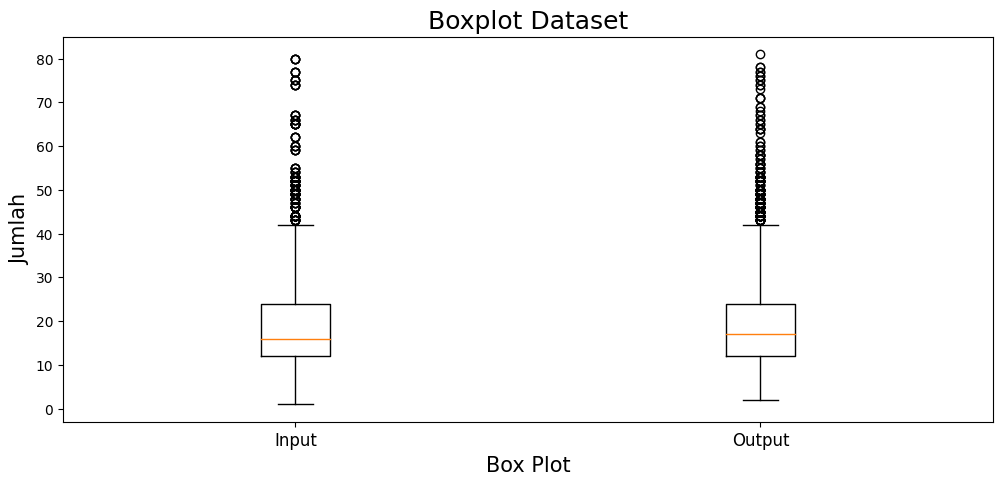

In [26]:
# Display boxplot
box_plot(df_training, "Boxplot Dataset")

### Split dataset ✅

In [27]:
# Split dataset
df_train, df_test = train_test_split(df_training, test_size=0.2)

In [28]:
# Data check
print("Total training data     ", len(df_train.index), " line.")
print("Total test data         ", len(df_test.index), " line.")

Total training data      4803  line.
Total test data          1201  line.


### Generate to csv ✅

In [29]:
# Define function to generate csv
def generate_csv(csv_path, dataset):
    with open(csv_path, "w", newline="") as csvfile:
        writter = csv.writer(csvfile)
        writter.writerow(["input", "target"])

        for case in dataset:
            input_text = "grammar: " + case["input"]
            correction = case["output"]
            
            writter.writerow([input_text, correction])

In [30]:
# Pandas to dataset
dataset_train = Dataset.from_pandas(df_train)
dataset_test = Dataset.from_pandas(df_test)

In [31]:
# Generate csv dataset
generate_csv(TRAIN_CSV, dataset_train)
generate_csv(EVAL_CSV, dataset_test)

### Save to Drive ✅

In [32]:
# Save data
!cp -r {COLAB_BASE_PATH + TRAIN_CSV} {DRIVE_TARGET_PATH}
!cp -r {COLAB_BASE_PATH + EVAL_CSV} {DRIVE_TARGET_PATH}
!cp -r {COLAB_BASE_PATH + BOXPLOT + PNG} {DRIVE_TARGET_PATH}

## Fine Tuning 🆗

### Evaluate base model ✅

In [33]:
# Evalute base model before training
before_result = happy_t5.eval(EVAL_CSV)
loss_before_fine_tuning = before_result.loss

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating eval split: 0 examples [00:00, ? examples/s]

Dataset csv downloaded and prepared to /root/.cache/huggingface/datasets/csv/default-7526c64c711ba843/0.0.0/6954658bab30a358235fa864b05cf819af0e179325c740e4bc853bcc7ec513e1. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/1201 [00:00<?, ? examples/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:3606: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
You're using a T5TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


In [34]:
# Display loss
print("Before loss:", loss_before_fine_tuning)

Before loss: 1.303402304649353


### Training model ✅

In [35]:
# Define timer function
def timer(start, end):
    hours, rem = divmod(end-start, 3600)
    minutes, seconds = divmod(rem, 60)
    print("{:0>2}:{:0>2}:{:05.2f}".format(int(hours), int(minutes), seconds))

In [36]:
# Training model
args = TTTrainArgs(batch_size=8, num_train_epochs=6)

print("Start fine tuning...")
date_time_init = datetime.datetime.now().strftime("%Y-%m-%d at %H:%M:%S UTC")
print(date_time_init+"\n")

time_training_init = time.time()

happy_t5.train(TRAIN_CSV, args=args)

time_training_end = time.time()
time_training = time_training_init - time_training_end

print("\nEnd fine tuning...")
date_time_end = datetime.datetime.now().strftime("%Y-%m-%d at %H:%M:%S UTC")
print(date_time_end+"\n")

print("Fine tuning time:")
timer(time_training_init, time_training_end)

Start fine tuning...
2023-06-06 at 17:26:23 UTC



Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Dataset csv downloaded and prepared to /root/.cache/huggingface/datasets/csv/default-c5a1ac5d74d59087/0.0.0/6954658bab30a358235fa864b05cf819af0e179325c740e4bc853bcc7ec513e1. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/4803 [00:00<?, ? examples/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:3606: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:407: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Step,Training Loss
500,0.568000
1000,0.430200
1500,0.372400
2000,0.342100
2500,0.312000
3000,0.294000
3500,0.279800



End fine tuning...
2023-06-06 at 17:33:21 UTC

Fine tuning time:
00:06:57.57


## Evaluate and predict 🆗

### Evaluate ✅

In [37]:
# Evaluate model after fine tuning
after_loss = happy_t5.eval(EVAL_CSV)
loss_after_fine_tuning = after_loss.loss

  0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/1201 [00:00<?, ? examples/s]

In [38]:
# Display loss
print("After loss:", loss_after_fine_tuning)

After loss: 0.4159829616546631


### Visualize ✅

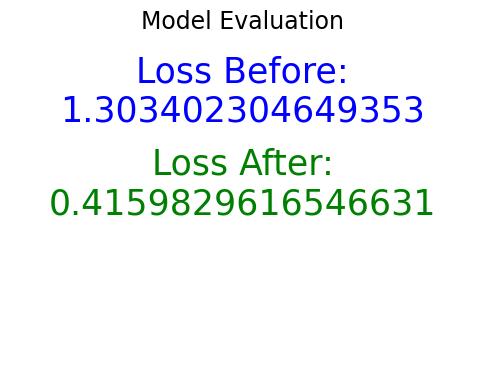

In [39]:
# Display evaluation
fig, ax = plt.subplots(figsize=(6, 4))

ax.text(0.5, 1, f"Loss Before:\n{loss_before_fine_tuning}",
        verticalalignment="top", horizontalalignment="center",
        transform=ax.transAxes,
        color="blue", fontsize=25)

ax.text(0.5, 0.7, f"Loss After:\n{loss_after_fine_tuning}",
        verticalalignment="top", horizontalalignment="center",
        transform=ax.transAxes,
        color="green", fontsize=25)

plt.title(label="Model Evaluation", fontsize=17, pad=19)
plt.axis("off")

# Save data in image
plt.savefig(MODEL_EVALUATION_PNG, dpi=300.0, transparent=True)

In [40]:
# Define timer
def display_timer(start, end):
    hours, rem = divmod(end-start, 3600)
    minutes, seconds = divmod(rem, 60)
    return int(hours), int(minutes), seconds

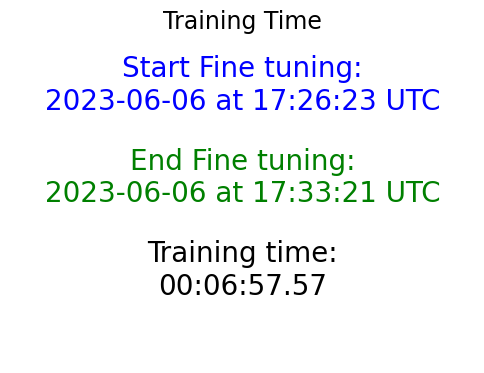

In [47]:
# Display training time
fig, ax = plt.subplots(figsize=(6, 4))

hours_train, minutes_train, seconds_train = display_timer(time_training_init, time_training_end)

ax.text(0.5, 1, f"Start Fine tuning:\n{date_time_init}",
        verticalalignment="top", horizontalalignment="center",
        transform=ax.transAxes,
        color="blue", fontsize=20)
ax.text(0.5, 0.7, f"End Fine tuning:\n{date_time_end}",
        verticalalignment="top", horizontalalignment="center",
        transform=ax.transAxes,
        color="green", fontsize=20)
ax.text(0.5, 0.4, "Training time:\n{:0>2}:{:0>2}:{:05.2f}".format(int(hours_train), int(minutes_train), seconds_train),
        verticalalignment="top", horizontalalignment="center",
        transform=ax.transAxes,
        color="black", fontsize=20)

plt.title(label="Training Time", fontsize=17, pad=19)
plt.axis("off")

# Save data in image
plt.savefig(TRAINING_TIME_PNG, dpi=300.0, transparent=True)

### Predict ✅

In [48]:
# Input text
text = "For mee, I think an job such as cameraman need a lot of physical work because what I know about camera is that it really heavy"

In [49]:
# Predict
beam_settings =  TTSettings(num_beams=8, min_length=1, max_length=1024)
text_generate = "grammar: " + text

result = happy_t5.generate_text(text_generate, args=beam_settings)

print(result.text)

For me, I think an job such as cameraman needs a lot of physical work because what I know about camera is that it is really heavy .


### Save to Drive ✅

In [50]:
# Save training process
!cp -r {COLAB_BASE_PATH + MODEL_EVALUATION + PNG} {DRIVE_TARGET_PATH}
!cp -r {COLAB_BASE_PATH + TRAINING_TIME + PNG} {DRIVE_TARGET_PATH}

## Save model 🆗

In [51]:
# Login hugging face
!huggingface-cli login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|
    
    To login, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Token: 
Add token as git credential? (Y/n) y
Token is valid (permission: write).
Cannot authenticate through git-credential as no helper is defined on your machine.
You might have to re-authenticate when pushing to the Hugging Face Hub.
Run the following command in your terminal in case you want to set the 'store' cr

In [52]:
# Create new repo
!huggingface-cli repo create {REPO_NAME}

git version 2.25.1
git-lfs/2.9.2 (GitHub; linux amd64; go 1.13.5)

You are about to create hafidikhsan/IELTS-GEC-T5-JFLEG
Proceed? [Y/n] y

Your repo now lives at:
  https://huggingface.co/hafidikhsan/IELTS-GEC-T5-JFLEG

You can clone it locally with the command below, and commit/push as usual.

  git clone https://huggingface.co/hafidikhsan/IELTS-GEC-T5-JFLEG



In [53]:
# Clone repo
!git clone {REPO_LINK}

Cloning into 'IELTS-GEC-T5-JFLEG'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (3/3), 413 bytes | 413.00 KiB/s, done.


In [54]:
# Git LFS init
%cd content
%cd {REPO_NAME}

!git lfs install

%cd ..

[Errno 2] No such file or directory: 'content'
/content
/content/IELTS-GEC-T5-JFLEG
Updated git hooks.
Git LFS initialized.
/content


In [55]:
# Save model
happy_t5.save(REPO_NAME + "/")

In [56]:
# Go to repo
%cd {REPO_NAME}
!git status

/content/IELTS-GEC-T5-JFLEG
On branch main
Your branch is up to date with 'origin/main'.

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	config.json
	generation_config.json
	pytorch_model.bin
	special_tokens_map.json
	spiece.model
	tokenizer.json
	tokenizer_config.json

nothing added to commit but untracked files present (use "git add" to track)


In [57]:
# Stage git
!git add .
!git status

On branch main
Your branch is up to date with 'origin/main'.

Changes to be committed:
  (use "git restore --staged <file>..." to unstage)
	new file:   config.json
	new file:   generation_config.json
	new file:   pytorch_model.bin
	new file:   special_tokens_map.json
	new file:   spiece.model
	new file:   tokenizer.json
	new file:   tokenizer_config.json



In [58]:
# Config git
!git config --global user.email {EMAIL}
!git config --global user.name {USERNAME}

In [61]:
# Commit git
!git commit -m {COMMIT}

[main 847efad] Initial commit for IELTS GEC T5 Model with JFLEG Dataset
 7 files changed, 129707 insertions(+)
 create mode 100644 config.json
 create mode 100644 generation_config.json
 create mode 100644 pytorch_model.bin
 create mode 100644 special_tokens_map.json
 create mode 100644 spiece.model
 create mode 100644 tokenizer.json
 create mode 100644 tokenizer_config.json


In [62]:
# Push to Hugging Face
!git push {HUGGING_FACE_HUB}

Uploading LFS objects: 100% (2/2), 892 MB | 33 MB/s, done.
Enumerating objects: 10, done.
Counting objects: 100% (10/10), done.
Delta compression using up to 4 threads
Compressing objects: 100% (9/9), done.
Writing objects: 100% (9/9), 604.89 KiB | 7.03 MiB/s, done.
Total 9 (delta 1), reused 0 (delta 0)
To https://huggingface.co/hafidikhsan/IELTS-GEC-T5-JFLEG
   be60f78..847efad  main -> main


## Load model 🆗

In [63]:
#@title Install library
%%capture
!pip install errant
!pip install happytransformer
!pip install -U openai-whisper

In [64]:
#@title Download spacy
%%capture
!python -m spacy download en

In [65]:
# Import library
from happytransformer import HappyTextToText
from happytransformer import TTSettings
import whisper
import errant
import re

In [66]:
# Define audio wav test
audio_wav = "/content/drive/MyDrive/Final Project/Machine Learning/Fluency/Test audio/Citeureup 2.wav"

In [67]:
# Define asr function
def speech_to_text(model_base, audio_path):
    result = model_base.transcribe(audio_path)
    return result["text"]

In [68]:
# Define grammar function
def grammar_test(model_base, text):
    beam_settings =  TTSettings(num_beams=8, min_length=1, max_length=1024)
    text_generate = "grammar: " + text
    result = model_base.generate_text(text_generate, args=beam_settings)
    return result.text

In [69]:
# Define error calculation function
def error_calculation(annotator, original_text = "", correction_text = ""):
    orig = annotator.parse(original_text)
    cor = annotator.parse(correction_text)
    edits = annotator.annotate(orig, cor)

    correct_text_len = len(re.findall(r"\w+", correction_text))
    error_len = len(edits)

    percent = (1 - (error_len/correct_text_len)) * 100

    return percent

In [70]:
# Define level function
def to_level(percent = 0):
    if percent >= 90 and percent <= 100:
        return 9
    elif percent >= 80 and percent < 90:
        return 8
    elif percent >= 70 and percent < 80:
        return 7
    elif percent >= 60 and percent < 70:
        return 6
    elif percent >= 50 and percent < 60:
        return 5
    elif percent >= 40 and percent < 50:
        return 4
    elif percent >= 30 and percent < 40:
        return 3
    elif percent >= 20 and percent < 30:
        return 2
    elif percent >= 0 and percent < 20:
        return 1
    else:
        return 0

In [71]:
# Define IELTS Grammar function
def grammar(model_gec, model_whisper, wav):
    annotator = errant.load("en")

    asr = speech_to_text(model_whisper, wav)

    correct = grammar_test(model_gec, asr)

    error_percent = error_calculation(annotator, asr, correct)

    level = to_level(error_percent)

    return level

In [72]:
# Initialize ASR
model_whisper = whisper.load_model("medium.en")

100%|██████████████████████████████████████| 1.42G/1.42G [00:12<00:00, 124MiB/s]


In [73]:
# Load model
hafid_happy_t5 = HappyTextToText("T5", "hafidikhsan/" + REPO_NAME)

In [74]:
# Band predict
predict_band = grammar(hafid_happy_t5, model_whisper, audio_wav)
print("Grammar band is", predict_band)

Grammar band is 8
